## 대표적인 데이터 구조7: 트리

### 1. 트리 (Tree) 구조
- 트리: Node와 Branch를 이용해서, 사이클을 이루지 않도록 구성한 데이터 구조
- 실제로 어디에 많이 사용되나? 
  - 트리 중 이진 트리 (Binary Tree) 형태의 구조로, 탐색(검색) 알고리즘 구현을 위해 많이 사용됨

### 2. 알아둘 용어
- Node: 트리에서 데이터를 저장하는 기본 요소 (데이터와 다른 연결된 노드에 대한 Branch 정보 포함)
- Root Node: 트리 맨 위에 있는 노드
- Level: 최상위 노드를 Level 0으로 하였을 때, 하위 Branch로 연결된 노드의 깊이를 나타냄
- Parent Node: 어떤 노드의 다음 레벨에 연결된 노드
- Child Node: 어떤 노드의 상위 레벨에 연결된 노드
- Leaf Node (Terminal Node): Child Node가 하나도 없는 노드
- Sibling (Brother Node): 동일한 Parent Node를 가진 노드
- Depth: 트리에서 Node가 가질 수 있는 최대 Level
<img src="http://www.fun-coding.org/00_Images/tree.png" width="600" />


### 3. 이진 트리와 이진 탐색 트리 (Binary Search Tree)
- 이진 트리: 노드의 최대 Branch가 2인 트리
- 이진 탐색 트리 (Binary Search Tree, BST): 이진 트리에 다음과 같은 추가적인 조건이 있는 트리
  - 왼쪽 노드는 해당 노드보다 작은 값, 오른쪽 노드는 해당 노드보다 큰 값을 가지고 있음!
  
<img src="https://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-insertion-animation.gif" />

(출처: https://www.mathwarehouse.com/programming/gifs/binary-search-tree.php#binary-search-tree-insertion-node)  

### 4. 자료 구조 이진 탐색 트리의 장점과 주요 용도
- 주요 용도: 데이터 검색(탐색) 
- 장점: 탐색 속도를 개선할 수 있음(BST : 데이터의 검색 시간은 항상 TREE의 DEPTH와 동일하기 때문에 최적의 검색 성능)

> 단점은 이진 탐색 트리 알고리즘 이해 후에 살펴보기로 함

### 이진트리와 정렬된 배열간의 탐색 비교
<img src="https://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-sorted-array-animation.gif" />

(출처: https://www.mathwarehouse.com/programming/gifs/binary-search-tree.php#binary-search-tree-insertion-node)

### 5. 파이썬 객체지향 프로그래밍으로 링크드 리스트 구현하기

#### 5.1. 노드 클래스 만들기

In [3]:
class Node:
    def __init__(self, value): # 하나의 노드는 2개의 주소(left, right)를 갖고 있다(double linked list와 유사)
        self.value = value
        self.left = None
        self.right = None
# 처음부터 branch를 갖고 있는 노드를 넣을 일은 없기 때문에 default 주소 값을 받을 필요 없음 -> 따라서, 초기화 단계에서는 None으로 두기

#### 5.2. 이진 탐색 트리에 데이터 넣기
* 이진 탐색 트리 조건에 부합하게 데이터를 넣어야 함

In [1]:
class NodeMgmt:
    def __init__(self, head):
        self.head = head  # 처음 들어온 노드는 root node가 됨
    def insert(self, value):
        self.current_node = self.head
        while True:
            if value < self.current_node.value:                # 새로 들어온 노드의 값이 기존의 노드보다 작다면
                if self.current_node.left != None:            # 1-1.기존 노드의 왼쪽 branch에 이미 값이 있다면 
                    self.current_node = self.current_node.left # 1-2. 현재 노드를 왼쪽 branch에 있는 노드로 바꾼 후 값을 비교하여, 작으면 왼쪽 branch 크면 오른쪽 branch로 보내야 함
                else:
                    self.current_node.left = Node(value)       # 2. 기존 노드의 왼쪽 branch에 노드가 없다면, 왼쪽 branch에 새로 들어온 노드를 연결하면 됨
                    break
            else:        # 새로운 노드의 값이 기존 노드와 같거나 더 크면 오른쪽 branch로 보내야 함
                if self.current_node.right != None:
                    self.current_node = self.current_node.right
                else:
                    self.current_node.right = Node(value)
                    break
                            

In [4]:
head = Node(1)
BST = NodeMgmt(head)   # root node를 가진 BST(데이터 구조) 객체 생성
BST.insert(2)          # 아래의 SEARCH CODE를 만들어야 삽입된 값을 확인할 수 있음

#### 5.3. 이진 탐색 트리 탐색

In [5]:
class NodeMgmt:
    def __init__(self, head):
        self.head = head
    
    def insert(self, value):
        self.current_node = self.head
        while True:
            if value < self.current_node.value:
                if self.current_node.left != None:
                    self.current_node = self.current_node.left
                else:
                    self.current_node.left = Node(value)
                    break
            else:
                if self.current_node.right != None:
                    self.current_node = self.current_node.right
                else:
                    self.current_node.right = Node(value)
                    break
    
    # 위 이진 탐색 트리에 특정 데이터를 저장하고 있는 노드가 있는지 없는지를 확인하는 코드
    def search(self, value):
        self.current_node = self.head
        while self.current_node:   # current_node가 없으면 while문 종료됨
            if self.current_node.value == value:
                return True
            elif value < self.current_node.value:
                self.current_node = self.current_node.left
            else:
                self.current_node = self.current_node.right
        
        return False # 이진 탐색 트리 안에 해당 데이터를 가진 노드가 없다면 False 반환

In [6]:
head = Node(1)    # root node 생성
BST = NodeMgmt(head)
BST.insert(2)
BST.insert(3)
BST.insert(0)
BST.insert(4)
BST.insert(8)

In [7]:
BST.search(-1)

False

In [8]:
BST.search(0)

True

#### 5.4. 이진 탐색 트리 삭제 
* 매우 복잡함. **경우를 나누어서 이해하는 것이 좋음**

#### 5.4.1. Leaf Node 삭제 
* Leaf Node: Child Node 가 없는 Node
* 삭제할 Node의 Parent Node가 삭제할 Node를 가리키지 않도록 한다. 
   - 즉, Node 19를 삭제하면서 Node 15의 branch를 None으로 만들어 없애면 됨
<img src="http://www.fun-coding.org/00_Images/tree_remove_leaf.png" width="800" />

#### 5.4.2. Child Node 가 하나인 Node 삭제 
* 삭제할 Node의 Parent Node가 삭제할 Node의 Child Node를 가리키도록 한다.
   - Node 15를 삭제하고, parent node의 branch가 삭제할 노드의 child node를 가리키게 하면 됨
<img src="http://www.fun-coding.org/00_Images/tree_remove_1child.png" width="800" />

#### 5.4.3. Child Node 가 두 개인 Node 삭제
1. **삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키도록 한다.**  
     - 즉, Node 5를 삭제할 때, Node 4의 자식들 중 가장 왼쪽에 있는 값을 Node 5자리에 삽입
    
    
2. 삭제할 Node의 왼쪽 자식 중, 가장 큰 값을 삭제할 Node의 Parent Node가 가리키도록 한다.
     - 즉, Node 5를 삭제할 때, Node 3의 자식들 중 가장 오른쪽에 있는 값을 Node 5자리에 삽입
<img src="http://www.fun-coding.org/00_Images/tree_remove_2child.png" width="800" />

##### 5.4.3.1. 삭제할 Node의 오른쪽 자식중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키게 할 경우
**divide & conquer : 복잡한 문제일수록 프로세스를 세밀하게 쪼개서, 하나씩 해결해야 함**
- 삭제할 Node의 오른쪽 자식 선택
- 오른쪽 자식의 가장 왼쪽에 있는 Node를 선택
- 해당 Node를 삭제할 Node의 Parent Node의 왼쪽 Branch가 가리키게 함
- 해당 Node의 왼쪽 Branch가 삭제할 Node의 왼쪽 Child Node를 가리키게 함
- 해당 Node의 오른쪽 Branch가 삭제할 Node의 오른쪽 Child Node를 가리키게 함
- 만약 해당 Node가 오른쪽 Child Node를 가지고 있었을 경우에는, 해당 Node의 본래 Parent Node의 왼쪽 Branch가 해당 오른쪽 Child Node를 가리키게 함

### 5.5. 이진 탐색 트리 삭제 코드 구현과 분석

#### 5.5.1 삭제할 Node 탐색
- 삭제할 Node가 없는 경우도 처리해야 함
  - 이를 위해 삭제할 Node가 없는 경우는 False를 리턴하고, 함수를 종료 시킴

In [ ]:
# def delete(self, value):
    searched = False  # 트리를 순회하며 해당 노드를 찾았는지 나타내는 변수 (true이면 해당 value를 가진 노드가 트리 안에 있음을 의미)
    self.current_node = self.head   # current_node가 삭제할 노드를 지칭하게 해야 하고, parent node는 삭제할 노드의 parent를 지칭하게 만들기
    self.parent = self.head
    while self.current_node:       # head node 부터 순회
        if self.current_node.value == value:
            searched = True
            break
        elif value < self.current_node.value:
            self.parent = self.current_node
            self.current_node = self.current_node.left   # 만약 left branch에 node가 없으면, None이 반환되며 반복문 종료됨
        else:
            self.parent = self.current_node
            self.current_node = self.current_node.right
    
    if searched == False: # 해당 value를 가진 node가 트리 내부에 없는 경우 false 반환 후 종료 
        return False
    
    ### 이후부터 Case들을 분리해서, 코드 작성 : 이후 코드에서는 방금 작성한 코드로 인해 
    # current_node는 삭제할 노드를, parent_node는 current_node의 부모를 가리킴

#### 5.5.2. Case1: 삭제할 Node가 Leaf Node인 경우
<img src="http://www.fun-coding.org/00_Images/tree_remove_leaf_code.png" width="600" />

In [ ]:
# self.current_node 가 삭제할 Node, self.parent는 삭제할 Node의 Parent Node인 상태
    if  self.current_node.left == None and self.current_node.right == None:  # branch가 없는 leaf node인지 확인
        if value < self.parent.value:
            self.parent.left = None
        else:
            self.parent.right = None
        del self.current_node    # 삭제할 노드인 current_node 객체를 메모리 상에서 지운다

#### 5.5.2. Case2: 삭제할 Node가 Child Node를 한 개 가지고 있을 경우
1) current_node의 child node가 왼쪽 branch에 연결된 경우  
2) current_node의 child node가 오른쪽 branch에 연결된 경우  
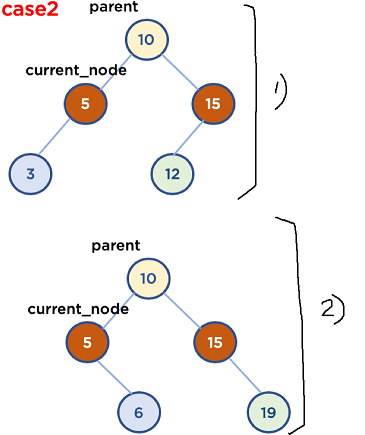

In [ ]:
    if self.current_node.left != None and self.current_node.right == None: # 1) current_node의 child node가 왼쪽에만 있는 경우
        if value < self.parent.value:                                        # current_node가 parent_node의 왼쪽에 있는 경우
            self.parent.left = self.current_node.left
        else:                                                                # current_node가 parent_node의 오른쪽에 있는 경우
            self.parent.right = self.current_node.left
    elif self.current_node.left == None and self.current_node.right != None:  # 2) current_node의 child node가 오른쪽에만 있는 경우
        if value < self.parent.value:
            self.parent.left = self.current_node.right
        else:
            self.parent.right = self.current_node.right

#### 5.5.3. Case3-1: 삭제할 Node가 Child Node를 두 개 가지고 있을 경우 (삭제할 Node가 Parent Node 왼쪽에 있을 때)
* 기본 사용 가능 전략(1,2는 암기하기!!)
  1. **삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키도록 한다.**
  2. 삭제할 Node의 왼쪽 자식 중, 가장 큰 값을 삭제할 Node의 Parent Node가 가리키도록 한다.
* 기본 사용 가능 전략 중, 1번 전략을 사용하여 코드를 구현하기로 함
  - 경우의 수가 또다시 두가지가 있음
    - **Case3-1-1:** 삭제할 Node가 Parent Node의 왼쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 Child Node가 없을 때
    - **Case3-1-2:** 삭제할 Node가 Parent Node의 왼쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 오른쪽에 Child Node가 있을 때
       - 가장 작은 값을 가진 Node의 Child Node가 왼쪽에 있을 경우는 없음, 왜냐하면 왼쪽 Node가 있다는 것은 해당 Node보다 더 작은 값을 가진 Node가 있다는 뜻이기 때문임


<img src="http://www.fun-coding.org/00_Images/tree_remove_2child_code_left.png" width="600" />

In [ ]:
    if self.current_node.left != None and self.current_node.right != None: # case3
        if value < self.parent.value:                                        # case3-1
            self.change_node = self.current_node.right
            self.change_node_parent = self.current_node.right
            while self.change_node.left != None:
                self.change_node_parent = self.change_node
                self.change_node = self.change_node.left
            if self.change_node.right != None:                              # case 3-1-2
                self.change_node_parent.left = self.change_node.right
            else:                                                           # case 3-1-1
                self.change_node_parent.left = None
            self.parent.left = self.change_node                              # node 31과 node 16 연결
            
            # node 16의 왼쪽 branch에 13, 오른쪽 branch에 18을 연결
            self.change_node.right = self.current_node.right 
            self.change_node.left = self.current_node.left

#### 5.5.4. Case3-2: 삭제할 Node가 Child Node를 두 개 가지고 있을 경우 (삭제할 Node가 Parent Node 오른쪽에 있을 때)
* 기본 사용 가능 전략
  1. **삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 삭제할 Node의 Parent Node가 가리키도록 한다.**
  2. 삭제할 Node의 왼쪽 자식 중, 가장 큰 값을 삭제할 Node의 Parent Node가 가리키도록 한다.
* 기본 사용 가능 전략 중, 1번 전략을 사용하여 코드를 구현하기로 함
  - 경우의 수가 또다시 두가지가 있음
    - **Case3-2-1:** 삭제할 Node가 Parent Node의 오른쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 Child Node가 없을 때
    - **Case3-2-2:** 삭제할 Node가 Parent Node의 오른쪽에 있고, 삭제할 Node의 오른쪽 자식 중, 가장 작은 값을 가진 Node의 오른쪽에 Child Node가 있을 때
       - 가장 작은 값을 가진 Node의 Child Node가 왼쪽에 있을 경우는 없음, 왜냐하면 왼쪽 Node가 있다는 것은 해당 Node보다 더 작은 값을 가진 Node가 있다는 뜻이기 때문임


<img src="http://www.fun-coding.org/00_Images/tree_remove_2child_code_right.png" width="600" />

In [ ]:
        else:    # 삭제할 노드가 parent node의 오르쪽에 있는 경우
            self.change_node = self.current_node.right
            self.change_node_parent = self.current_node.right
            
            # 반복문이 끝나면 change_node는 가장 왼쪽에 있는 node 16, change_node_parent는 node 18을 가리킴
            while self.change_node.left != None:
                self.change_node_parent = self.change_node
                self.change_node = self.change_node.left
                
            # case 3-2-2    
            if self.change_node.right != None:
                self.change_node_parent.left = self.change_node.right  # node 18과 node 17을 연결
            
            # case 3-2-1
            else:
                self.change_node_parent.left = None
            
            # node 16이 node 15를 대체한 후
            self.parent.right = self.change_node             # node 10과 node 16 연결
            self.change_node.left = self.current_node.left   # node 16과 node 13 연결
            self.change_node.right = self.current_node.right # node 16과 node 18 연결
    

#### 5.5.5. 파이썬 전체 코드 구현

In [3]:
class Node:                        # left, right를 갖고 있는 각각의 노드
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

        
class NodeMgmt:                    # 이진탐색트리(BST)를 의미
    def __init__(self, head):
        self.head = head
    
    def insert(self, value):
        self.current_node = self.head
        while True:
            if value < self.current_node.value:
                if self.current_node.left != None:
                    self.current_node = self.current_node.left
                else:
                    self.current_node.left = Node(value)
                    break
            else:
                if self.current_node.right != None:
                    self.current_node = self.current_node.right
                else:
                    self.current_node.right = Node(value)
                    break
    
    def search(self, value):
        self.current_node = self.head
        while self.current_node:
            if self.current_node.value == value:
                return True
            elif value < self.current_node.value:
                self.current_node = self.current_node.left
            else:
                self.current_node = self.current_node.right
        return False        
    
    def delete(self, value):
        # 삭제할 노드 탐색
        searched = False
        self.current_node = self.head
        self.parent = self.head
        while self.current_node:
            if self.current_node.value == value:
                searched = True
                break
            elif value < self.current_node.value:
                self.parent = self.current_node
                self.current_node = self.current_node.left
            else:
                self.parent = self.current_node
                self.current_node = self.current_node.right

        if searched == False:
            return False    

        # case1
        if  self.current_node.left == None and self.current_node.right == None:
            if value < self.parent.value:
                self.parent.left = None
            else:
                self.parent.right = None
        
        # case2
        elif self.current_node.left != None and self.current_node.right == None:
            if value < self.parent.value:
                self.parent.left = self.current_node.left
            else:
                self.parent.right = self.current_node.left
        elif self.current_node.left == None and self.current_node.right != None:
            if value < self.parent.value:
                self.parent.left = self.current_node.right
            else:
                self.parent.right = self.current_node.right        
        
        # case 3
        elif self.current_node.left != None and self.current_node.right != None:
            # case3-1
            if value < self.parent.value:
                self.change_node = self.current_node.right
                self.change_node_parent = self.current_node.right
                while self.change_node.left != None:
                    self.change_node_parent = self.change_node
                    self.change_node = self.change_node.left
                if self.change_node.right != None:
                    self.change_node_parent.left = self.change_node.right
                else:
                    self.change_node_parent.left = None
                self.parent.left = self.change_node
                self.change_node.right = self.current_node.right
                self.change_node.left = self.current_node.left
            # case 3-2
            else:
                self.change_node = self.current_node.right
                self.change_node_parent = self.current_node.right
                while self.change_node.left != None:
                    self.change_node_parent = self.change_node
                    self.change_node = self.change_node.left
                if self.change_node.right != None:
                    self.change_node_parent.left = self.change_node.right
                else:
                    self.change_node_parent.left = None
                self.parent.right = self.change_node     # case 3-1과 유일하게 다른 코드 : 삭제할 노드의 parent node의 오른쪽 branch에 연결
                self.change_node.right = self.current_node.right
                self.change_node.left = self.current_node.left

        return True

참고: http://ejklike.github.io/2018/01/09/traversing-a-binary-tree-1.html

#### 5.5.6. 파이썬 전체 코드 테스트
- random 라이브러리 활용
  - random.randint(첫번째 숫자, 마지막 숫자): 첫번째 숫자부터 마지막 숫자 사이에 있는 숫자를 랜덤하게 선택해서 리턴
    - 예: random.randint(0, 99): 0에서 99까지 숫자중 특정 숫자를 랜덤하게 선택해서 리턴해줌

> 위에서 생성한 tree가 잘 동작하는지 확인하는 방법으로 test code를 만드는 것이 가장 효과적  
> test code를 통해 BST가 빠르게 데이터를 검색할 수 있고, 필요한 데이터를 삽입/삭제할 수 있음을 확인

In [1]:
# 0 ~ 999 숫자 중에서 임의로 100개를 추출해서, 이진 탐색 트리에 입력, 검색, 삭제
import random      # 실행되지 않는 경우 pip install random 명령으로 라이브러리 설치하기

# 0 ~ 999 중, 100 개의 숫자 랜덤 선택
bst_nums = set()   # 중복값 있으면 입력, 검색, 삭제할 때 헷갈리는 요소가 될 수 있어 집합으로 만들어 중복값 제거된 유니크한 숫자 100개 추출
while len(bst_nums) != 100:
    bst_nums.add(random.randint(0, 999))  # 집합은 하나의 데이터를 추가할 때마다 add method 사용
print (bst_nums)

{2, 519, 9, 525, 22, 41, 553, 47, 48, 49, 51, 52, 54, 70, 584, 75, 587, 77, 600, 605, 100, 632, 646, 649, 654, 142, 662, 664, 162, 165, 680, 685, 179, 696, 198, 713, 714, 720, 213, 731, 733, 222, 740, 237, 242, 249, 770, 773, 774, 264, 777, 779, 272, 274, 275, 788, 278, 292, 805, 809, 814, 303, 824, 826, 831, 836, 841, 336, 854, 875, 370, 884, 895, 901, 394, 399, 924, 414, 927, 416, 935, 937, 430, 942, 948, 949, 454, 971, 461, 976, 470, 471, 984, 479, 992, 486, 487, 999, 490, 507}


In [4]:
# 선택된 100개의 숫자를 이진 탐색 트리에 입력, 임의로 루트노드는 500을 넣기로 함
head = Node(500)   # root node로 1을 넣으면 모든 노드가 오른쪽에만 치우칠 것. 편향된 트리를 방지하기 위해 중간값에 해당하는 500 넣음
binary_tree = NodeMgmt(head)  # 사실상 binary_search_tree
for num in bst_nums:
    binary_tree.insert(num)
    
# 입력한 100개의 숫자 검색 (검색 기능 확인)  - test code
for num in bst_nums:
    if binary_tree.search(num) == False:  # 트리 구조를 잘못 구성했거나, 데이터가 중간에 소실된 것
        print ('search failed', num)

# 아무것도 출력되지 않아야(True) 트리 구성이 잘 되었다는 뜻이고, 다음 단계로 넘어갈 수 있음

In [5]:
# 전체 코드

# 0 ~ 999 숫자 중에서 임의로 100개를 추출해서, 이진 탐색 트리에 입력, 검색, 삭제
import random     

# 0 ~ 999 중, 100 개의 숫자 랜덤 선택
bst_nums = set()   
while len(bst_nums) != 100:
    bst_nums.add(random.randint(0, 999))
# print (bst_nums)

# 선택된 100개의 숫자를 이진 탐색 트리에 입력, 임의로 루트노드는 500을 넣기로 함
head = Node(500)   
binary_tree = NodeMgmt(head)  
for num in bst_nums:
    binary_tree.insert(num)
    
# 입력한 100개의 숫자 검색 (검색 기능 확인)
for num in bst_nums:
    if binary_tree.search(num) == False:  
        print ('search failed', num)

# 입력한 100개의 숫자 중 10개의 숫자를 랜덤 선택
delete_nums = set()         # 중복을 막기 위해(난수로 0이 두 번 나왔을 때 0을 두 번 지울 수 없음) 집합으로 구성
bst_nums = list(bst_nums)   # 인덱스 번호로 접근하기 위해 list type으로 변환
while len(delete_nums) != 10:
    delete_nums.add(bst_nums[random.randint(0, 99)])

# 선택한 10개의 숫자를 삭제 (삭제 기능 확인)
for del_num in delete_nums:
    if binary_tree.delete(del_num) == False:
        print('delete failed', del_num)  # 아무것도 출력되지 않아야 이슈 없이 해당 노드가 잘 삭제되었다는 것 = 코드로 트리 구성을 잘 했음

### 6. 이진 탐색 트리의 시간 복잡도와 단점
#### 6.1. 시간 복잡도 (탐색시)
  - depth (트리의 높이) 를 h라고 표기한다면, O(h)
  - n개의 노드를 가진다면, $h = log_2{n} $ 에 가까우므로(노드가 1개이면 0, 노드가 2-3개이면 1,노드가 4-7개이면 2에 가까움), 시간 복잡도는 $ O(log{n}) $ 
     - 참고: 빅오 표기법에서 $log{n}$ 에서의 log의 밑은 10이 아니라, 2입니다.
       - 한번 실행시마다, 50%의 실행할 수도 있는 명령을 제거한다는 의미. 즉 50%의 실행시간을 단축시킬 수 있다는 것을 의미함
       - 즉, 한번 검색할 때마다 탐색할 candidates가 절반은 사라진다는 의미(기준보다 큰 값인지 작은 값인지만 판단하면 됨)
<img src="https://www.mathwarehouse.com/programming/images/binary-search-tree/binary-search-tree-sorted-array-animation.gif" />

(출처: https://www.mathwarehouse.com/programming/gifs/binary-search-tree.php#binary-search-tree-insertion-node)

#### 6.2. 이진 탐색 트리 단점
  - 평균 시간 복잡도는 $ O(log{n}) $ 이지만, 
    - 이는 트리가 균형잡혀 있을 때의 평균 시간복잡도이며,
  - 다음 예와 같이 구성되어 있을 경우, 최악의 경우는 링크드 리스트등과 동일한 성능을 보여줌 ( $O(n)$ )
    - 참고 : 강제로 데이터가 양쪽으로 고르게 트리를 구성할 수 있도록 하는 알고리즘이 존재한다.
<img src="http://www.fun-coding.org/00_Images/worstcase_bst.png" width="300" />